In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from google.colab import files
%matplotlib inline

In [6]:
uploaded = files.upload()
df = pd.read_csv('us_covid19_daily.csv')

Saving us_covid19_daily.csv to us_covid19_daily.csv


In [7]:
df.head(5)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,3322.0,5624444.0,2020-12-06T24:00:00Z,273374.0,585676.0,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201205,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,3321.0,5576026.0,2020-12-05T24:00:00Z,272236.0,583420.0,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,20201204,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,3305.0,5470389.0,2020-12-04T24:00:00Z,269791.0,580104.0,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,20201203,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,3280.0,5404018.0,2020-12-03T24:00:00Z,267228.0,575452.0,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,20201202,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,3252.0,5322128.0,2020-12-02T24:00:00Z,264522.0,570121.0,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82


In [8]:
df.shape


(320, 25)

In [ ]:
df.describe()


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,totalTestResults,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,3.200000e+02,320.000000,3.200000e+02,3.200000e+02,278.000000,265.000000,278.000000,256.000000,257.000000,257.000000,250.00000,2.570000e+02,301.000000,278.000000,3.200000e+02,320.0,320.0,320.000000,320.00000,3.200000e+02,320.000000,3.200000e+02
mean,2.020066e+07,48.853125,3.963366e+06,4.707150e+07,9042.223022,44522.373585,276808.104317,9200.675781,14374.735409,3146.070039,1553.63600,1.782062e+06,122746.139535,276808.104317,5.651348e+07,0.0,0.0,854.293750,1830.23750,5.062072e+05,45418.859375,6.376996e+05
std,3.041616e+02,17.519724,3.837424e+06,4.863156e+07,11367.578741,19060.814409,160875.737479,3806.564610,8528.022020,1667.846582,961.90535,1.518054e+06,82559.099864,160875.737479,5.970415e+07,0.0,0.0,654.573738,1847.01654,3.888724e+05,45243.105210,5.215503e+05
min,2.020012e+07,2.000000,0.000000e+00,0.000000e+00,124.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,32.00000,9.700000e+01,0.000000,4.000000,1.000000e+00,0.0,0.0,0.000000,-2849.00000,0.000000e+00,0.000000,0.000000e+00
25%,2.020041e+07,56.000000,5.243978e+05,2.177519e+06,2819.500000,32180.000000,158522.750000,6267.500000,8109.000000,2045.000000,711.75000,4.777940e+05,50175.000000,158522.750000,2.770965e+06,0.0,0.0,352.000000,816.75000,1.189028e+05,20310.250000,1.513970e+05
50%,2.020063e+07,56.000000,2.600174e+06,2.954071e+07,4300.000000,41871.000000,276369.000000,8315.500000,14044.000000,2533.000000,1478.00000,1.437182e+06,125464.000000,276369.000000,3.350979e+07,0.0,0.0,859.000000,1564.00000,5.566565e+05,34292.500000,6.456460e+05
75%,2.020092e+07,56.000000,6.624805e+06,8.293463e+07,11444.250000,55449.000000,397899.250000,11164.250000,20686.000000,4383.000000,2368.00000,2.895307e+06,192826.000000,397899.250000,9.813412e+07,0.0,0.0,1195.000000,2414.00000,7.581605e+05,56288.250000,9.562088e+05
max,2.020121e+07,56.000000,1.453404e+07,1.619863e+08,65709.000000,101487.000000,585676.000000,20145.000000,31946.000000,7094.000000,3322.00000,5.624444e+06,273374.000000,585676.000000,2.040639e+08,0.0,0.0,2752.000000,17287.00000,1.941714e+06,224831.000000,2.340996e+06


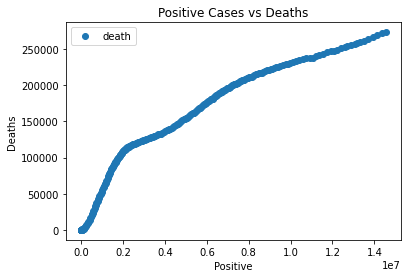

In [9]:

df.plot(x='positive', y='death', style='o')
plt.title('Positive Cases vs Deaths')  
plt.xlabel('Positive')  
plt.ylabel('Deaths')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


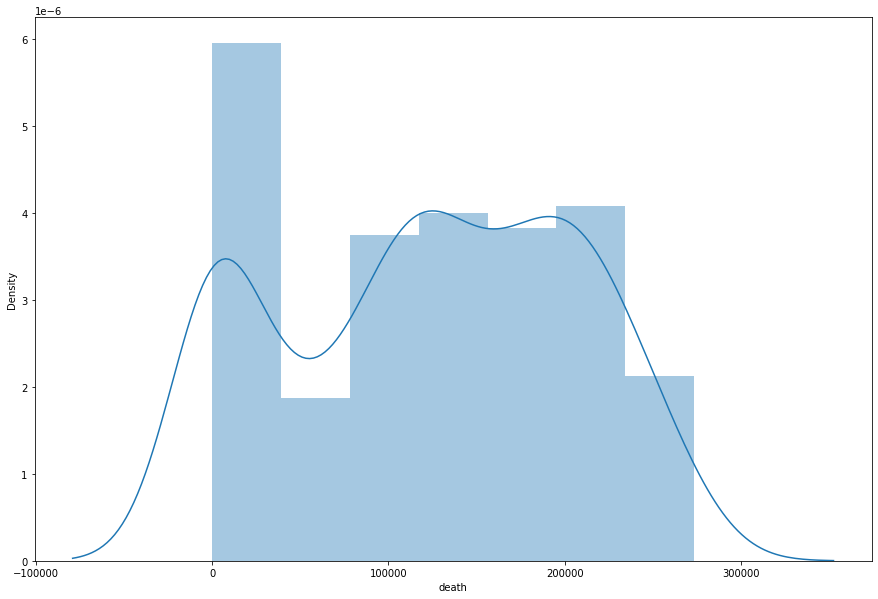

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['death'])

In [15]:

x = df['positive'].values.reshape(-1,1)
y = df['death'].values.reshape(-1,1)

In [31]:

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)


In [41]:
from sklearn import linear_model
import sklearn

df.fillna(0,inplace=True)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.8)

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
# regressor = LinearRegression()  
# regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#To retrieve the intercept:
print(regressor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [45]:
y_pred = linear.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [46]:
df

,Actual,Predicted
0,117748.0,81676.172406
1,222854.0,250723.747102
2,34730.0,38777.861342
3,4332.0,26035.037200
4,243820.0,311994.615160
...,...,...
251,120087.0,87114.213425
252,0.0,21052.056581
253,102187.0,67168.066378
254,114455.0,76627.003472


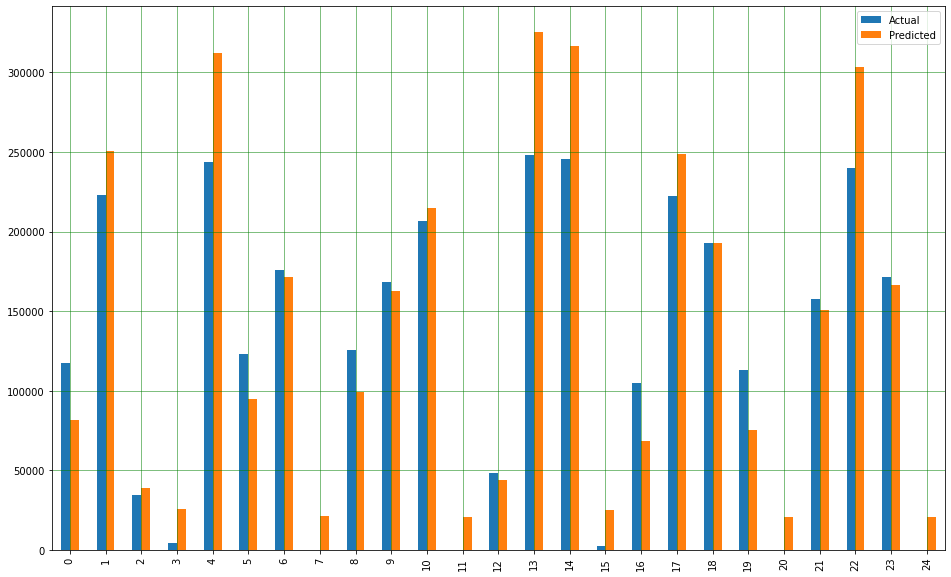

In [47]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

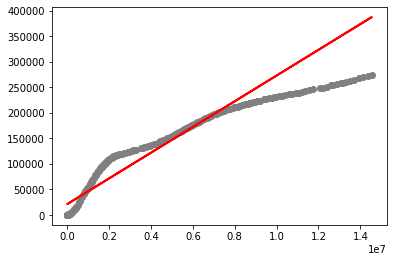

In [48]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()